# Expanding New Dessert Business To One Or More Districts in Hong Kong
The investor opened a desert store in Mong Kok two years back and his business turns profits recently.

Firstly, download all the required libraries

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#import requests

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will

## 1. Extract the Latitudes and Longtitudes for Hong Kong and its 18 Districts
Latitudes and Longtitudes provided by Nominatim API are not very accurate for Hong Kong. Since there are only 18 Districts in Hong Kong, I got their coordinates via the Internet

Ignore this part

In [3]:
"""
geolocator = Nominatim(user_agent="ny_explorer")

HK = pd.DataFrame(columns=['District', 'Latitude', 'Longitude'])
HK = pd.DataFrame({'District': ['Central and Western', 'Wan Chai', 'Eastern', 'Southern', 'Yau Tsim Mong', 'Sham Shui Po', 'Kowloon City', 'Wong Tai Sin', 'Kwun Tong', 'Kwai Tsing', \
                                'Tsuen Wan', 'Tuen Mun', 'Yuen Long', 'North', 'Tai Po', 'Sha Tin', 'Sai Kung', 'Islands']})
HK['Latitude'] = 0
HK['Longitude'] = 0

for i in range(HK.shape[0]):
    address = HK.loc[i,'District'] + ' District, Hong Kong'
    location = geolocator.geocode(address)
    HK.loc[i,'Latitude'] = location.latitude
    HK.loc[i,'Longitude'] = location.longitude

HK"""

'\ngeolocator = Nominatim(user_agent="ny_explorer")\n\nHK = pd.DataFrame(columns=[\'District\', \'Latitude\', \'Longitude\'])\nHK = pd.DataFrame({\'District\': [\'Central and Western\', \'Wan Chai\', \'Eastern\', \'Southern\', \'Yau Tsim Mong\', \'Sham Shui Po\', \'Kowloon City\', \'Wong Tai Sin\', \'Kwun Tong\', \'Kwai Tsing\',                                 \'Tsuen Wan\', \'Tuen Mun\', \'Yuen Long\', \'North\', \'Tai Po\', \'Sha Tin\', \'Sai Kung\', \'Islands\']})\nHK[\'Latitude\'] = 0\nHK[\'Longitude\'] = 0\n\nfor i in range(HK.shape[0]):\n    address = HK.loc[i,\'District\'] + \' District, Hong Kong\'\n    location = geolocator.geocode(address)\n    HK.loc[i,\'Latitude\'] = location.latitude\n    HK.loc[i,\'Longitude\'] = location.longitude\n\nHK'

Some of the statistics are from https://www.censtatd.gov.hk/hkstat/sub/sp150_tc.jsp?productCode=FA100096

In [4]:
HK = pd.read_csv('https://raw.githubusercontent.com/psyyip/Coursera_Capstone/master/HK_statistics.csv')
#HK = pd.read_csv('HK_statistics.csv')
HK = HK.dropna()
HK['Density'] = HK['Total Population'] / HK['Area (km2)']
#bins = np.linspace(min(HK["Density"]), max(HK["Density"]), 6)
#group_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
#HK['Density_bin'] = pd.cut(HK['Density'], bins, labels=group_names, include_lowest=True )
HK

,District,Latitude,Longitude,Female,Male,Total Population,0-14,15-24,45-64,25-44,65+,Median age,Area (km2),radius,Density
0,Central and Western,22.286660,114.15497,133900,107700,241600,23918,25368,76104,77554,38656,43,12.44,1.990423,19421.221865
1,Wan Chai,22.277020,114.17232,101100,78300,179400,17761,15608,57408,59561,29242,44,9.83,1.769343,18250.254323
2,Eastern,22.284110,114.22414,301600,244800,546400,63382,51908,167198,173755,90156,43,18.56,2.431219,29439.655172
3,Southern,22.247250,114.15884,145400,118500,263900,30612,25598,82073,84184,41432,43,38.85,3.517472,6792.792793
4,Yau Tsim Mong,22.321380,114.17260,179800,153800,333600,37363,36362,102749,108086,49373,42,6.99,1.492017,47725.321888
5,Sham Shui Po,22.330983,114.16224,215600,185000,400600,49274,40461,122984,125788,61692,42,9.35,1.725603,42844.919786
6,Kowloon City,22.316670,114.18333,225800,186100,411900,47780,41602,127277,132220,62609,43,10.02,1.786360,41107.784431
7,Wong Tai Sin,22.350000,114.18333,224800,195800,420600,44584,45004,119871,137116,74026,45,9.30,1.720983,45225.806452
8,Kwun Tong,22.323300,114.21540,355300,308800,664100,79028,67738,195245,208527,113561,43,11.27,1.894511,58926.353150
9,Kwai Tsing,22.352880,114.10004,270400,237200,507600,58882,53806,152280,159894,82739,43,23.34,2.726375,21748.071979


I did not use Hong Kong's latitude and longitude directly from Nominatim API directly. I moved a little bit to make the window looks much better

In [5]:
geolocator = Nominatim(user_agent="ny_explorer")

address = 'Hong Kong, China'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
# get better window
latitude, longtitude = 22.383205, 114.141907
print('The geograpical coordinate of Hong Kong are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Hong Kong are 22.383205, 114.1628131.


Map with the 18 Districts

In [6]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10.5)

# add markers to map
for dis, lat, lng in zip(HK['District'], HK['Latitude'], HK['Longitude']):
    label = '{}'.format(dis)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

## 2. Clean data

The data is very simple and clear, so no need to anything with the 

## 3. Define Foursquare credentials and version

In [7]:
# The code was removed by Watson Studio for sharing.

Explore neighborhoods in our dataframe by getting the top 100 venues that are in neighborhoods within a circle around each district

In [8]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng, rad in zip(names, latitudes, longitudes, radius):
        print(name)
        rad = rad *1000
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            rad, 
            LIMIT)
 
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
                
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    
    nearby_venues.columns = ['District', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
        
    return(nearby_venues)   

Call the function getNearbyVenues to loop all the 18 districts

In [9]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
#radius = 500 # define radius
HK_venues = getNearbyVenues(names=HK['District'],
                                   latitudes=HK['Latitude'],
                                   longitudes=HK['Longitude'],
                                   radius=HK['radius']
                                  )

Central and Western
Wan Chai
Eastern
Southern
Yau Tsim Mong
Sham Shui Po
Kowloon City
Wong Tai Sin
Kwun Tong
Kwai Tsing
Tsuen Wan
Tuen Mun
Yuen Long
North
Tai Po
Sha Tin
Sai Kung
Islands


The top 100 venues for each of the district

In [10]:
print(HK_venues.shape)
print(HK_venues.head())
print(HK_venues.groupby('District').count().head(5))
print('\nThere are {} unique categories.'.format(len(HK_venues['Venue Category'].unique())))

(1612, 7)
              District  Neighborhood Latitude  Neighborhood Longitude  \
0  Central and Western               22.28666               114.15497   
1  Central and Western               22.28666               114.15497   
2  Central and Western               22.28666               114.15497   
3  Central and Western               22.28666               114.15497   
4  Central and Western               22.28666               114.15497   

                                   Venue  Venue Latitude  Venue Longitude  \
0  Four Seasons Hotel Hong Kong (香港四季酒店)       22.286554       114.156929   
1                The Spa at Four Seasons       22.286279       114.157623   
2                 VEA Restaurant and Bar       22.284890       114.152953   
3                          Coco Espresso       22.285117       114.152466   
4                           HK Brewcraft       22.283352       114.154738   

      Venue Category  
0              Hotel  
1                Spa  
2  French Restauran

In [11]:
x = HK_venues.groupby('District').count()
print(x['Venue'])

District
Central and Western    100
Eastern                 98
Islands                100
Kowloon City           100
Kwai Tsing              78
Kwun Tong              100
North                  100
Sai Kung               100
Sha Tin                100
Sham Shui Po           100
Southern               100
Tai Po                  68
Tsuen Wan               67
Tuen Mun                60
Wan Chai               100
Wong Tai Sin            43
Yau Tsim Mong          100
Yuen Long               98
Name: Venue, dtype: int64


In [12]:
HK_venues

,District,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central and Western,22.286660,114.15497,Four Seasons Hotel Hong Kong (香港四季酒店),22.286554,114.156929,Hotel
1,Central and Western,22.286660,114.15497,The Spa at Four Seasons,22.286279,114.157623,Spa
2,Central and Western,22.286660,114.15497,VEA Restaurant and Bar,22.284890,114.152953,French Restaurant
3,Central and Western,22.286660,114.15497,Coco Espresso,22.285117,114.152466,Coffee Shop
4,Central and Western,22.286660,114.15497,HK Brewcraft,22.283352,114.154738,Beer Store
5,Central and Western,22.286660,114.15497,Pure Yoga,22.283022,114.155674,Yoga Studio
6,Central and Western,22.286660,114.15497,Ronin,22.284525,114.152430,Japanese Restaurant
7,Central and Western,22.286660,114.15497,Blue Bar,22.286817,114.157464,Hotel Bar
8,Central and Western,22.286660,114.15497,Sushi Saito (鮨·齋藤),22.286412,114.157013,Sushi Restaurant
9,Central and Western,22.286660,114.15497,Central Indian Restaurant,22.285622,114.153839,Indian Restaurant


Number of venues in each district provided by Foursquare API

In [13]:
HK_venues.groupby('District').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Central and Western,100,100,100,100,100,100
Eastern,98,98,98,98,98,98
Islands,100,100,100,100,100,100
Kowloon City,100,100,100,100,100,100
Kwai Tsing,78,78,78,78,78,78
Kwun Tong,100,100,100,100,100,100
North,100,100,100,100,100,100
Sai Kung,100,100,100,100,100,100
Sha Tin,100,100,100,100,100,100


## 4. Analyze each neighborhood

Each venue category becomes one feature using the One Hot method

In [14]:
# one hot encoding
#the venue category of index 436,312,1177,1093 are "neighborhood"
#print(Toronto_venues[['Venue Category']].sort_values(by='Venue Category',axis=0))
HK_onehot = pd.get_dummies(HK_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe. Have to renamed it to "Neighborhoods" as there is a venue cateogry called "Neighborhood"
HK_onehot['District'] = HK_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [HK_onehot.columns[-1]] + list(HK_onehot.columns[:-1])
HK_onehot = HK_onehot[fixed_columns]

print(HK_onehot.shape)
HK_onehot.head()

(1612, 218)


,District,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,American Restaurant,Aquarium,Argentinian Restaurant,Art Gallery,Asian Restaurant,Astrologer,Athletics & Sports,BBQ Joint,Bakery,Bar,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Beijing Restaurant,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Campground,Cantonese Restaurant,Cave,Cha Chaan Teng,Chinese Aristocrat Restaurant,Chinese Breakfast Place,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Gym,Comfort Food Restaurant,Concert Hall,Convenience Store,Creperie,Cricket Ground,Cultural Center,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donburi Restaurant,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Exhibit,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gastropub,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hainan Restaurant,Halal Restaurant,Harbor / Marina,Heliport,Historic Site,History Museum,Hobby Shop,Hong Kong Restaurant,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jiangsu Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lingerie Store,Lounge,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Mountain,Movie Theater,Multiplex,Museum,Music Venue,Nature Preserve,Neighborhood,Nightclub,Non-Profit,Noodle House,Other Great Outdoors,Pakistani Restaurant,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Store,Photography Studio,Pier,Pizza Place,Platform,Plaza,Pub,Public Art,Racecourse,Ramen Restaurant,Record Shop,Reservoir,Residential Building (Apartment / Condo),Rest Area,Restaurant,Salad Place,Sandwich Place,Satay Restaurant,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Snack Place,Soccer Field,Spa,Spanish Restaurant,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Temple,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Tourist Information Center,Toy / Game Store,Track Stadium,Trail,Train Station,Tunnel,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfall,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio,Yunnan Restaurant,Zhejiang Restaurant,Zoo,Zoo Exhibit
0,Central and Western,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Central and Western,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Group rows by district and by taking the mean of the frequency of occurrence of each venue category

In [15]:
HK_grouped = HK_onehot.groupby('District').mean().reset_index()
print(HK_grouped.head)
print(HK_grouped.shape)

<bound method NDFrame.head of                District  Accessories Store  Airport  Airport Food Court  \
0   Central and Western               0.00     0.00                0.00   
1               Eastern               0.00     0.00                0.00   
2               Islands               0.02     0.01                0.01   
3          Kowloon City               0.00     0.00                0.00   
4            Kwai Tsing               0.00     0.00                0.00   
5             Kwun Tong               0.00     0.00                0.00   
6                 North               0.00     0.00                0.00   
7              Sai Kung               0.00     0.00                0.00   
8               Sha Tin               0.00     0.00                0.00   
9          Sham Shui Po               0.00     0.00                0.00   
10             Southern               0.01     0.00                0.00   
11               Tai Po               0.00     0.00                0.0

Print each district along with the top 5 most common venues

In [16]:
num_top_venues = 10

for hood in HK_grouped['District']:
    print("----"+hood+"----")
    temp = HK_grouped[HK_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    # do not need the first title row
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Central and Western----
                  venue  freq
0           Coffee Shop  0.06
1  Gym / Fitness Center  0.04
2   Japanese Restaurant  0.04
3           Yoga Studio  0.04
4                 Hotel  0.04
5                   Bar  0.04
6  Cantonese Restaurant  0.03
7                  Café  0.03
8     French Restaurant  0.03
9        Ice Cream Shop  0.03


----Eastern----
                  venue  freq
0    Chinese Restaurant  0.06
1                  Park  0.06
2   Japanese Restaurant  0.05
3              Mountain  0.04
4      Department Store  0.04
5    Seafood Restaurant  0.04
6  Cantonese Restaurant  0.03
7    Dim Sum Restaurant  0.03
8          Noodle House  0.03
9           Coffee Shop  0.03


----Islands----
                venue  freq
0      Airport Lounge  0.09
1              Bakery  0.05
2         Coffee Shop  0.05
3               Beach  0.05
4           Gift Shop  0.03
5  Seafood Restaurant  0.03
6   Accessories Store  0.02
7        Cocktail Bar  0.02
8        Dessert Shop  0

## 5. Put these into a pandas DataFrame

Write a function to sort the venues in descending order.

In [17]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create the new dataframe with the venue categories sorted by frequency and display the top 10 venues for each district. Add the density feature after sorting

In [18]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = HK_grouped['District']

for ind in np.arange(HK_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(HK_grouped.iloc[ind, :], num_top_venues)

density = pd.DataFrame(HK[['District', 'Density']], index = HK.index, columns = ['District', 'Density'])
district_venues_sorted = district_venues_sorted.join(density.set_index('District'), on='District')
district_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Density
0,Central and Western,Coffee Shop,Hotel,Gym / Fitness Center,Yoga Studio,Japanese Restaurant,Bar,Café,Cantonese Restaurant,French Restaurant,Indian Restaurant,19421.221865
1,Eastern,Park,Chinese Restaurant,Japanese Restaurant,Department Store,Seafood Restaurant,Mountain,Dim Sum Restaurant,Noodle House,Cantonese Restaurant,Coffee Shop,29439.655172
2,Islands,Airport Lounge,Bakery,Coffee Shop,Beach,Seafood Restaurant,Gift Shop,Accessories Store,Café,Mountain,Japanese Restaurant,915.372316
3,Kowloon City,Dessert Shop,Hotel,Chinese Restaurant,Coffee Shop,Shopping Mall,Noodle House,Toy / Game Store,Athletics & Sports,Snack Place,Market,41107.784431
4,Kwai Tsing,Chinese Restaurant,Shopping Mall,Park,Noodle House,Sushi Restaurant,Japanese Restaurant,Cha Chaan Teng,Coffee Shop,Italian Restaurant,Café,21748.071979
5,Kwun Tong,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Café,Shopping Mall,Hong Kong Restaurant,Multiplex,Sushi Restaurant,Noodle House,Cantonese Restaurant,58926.353150
6,North,Chinese Restaurant,Coffee Shop,Fast Food Restaurant,Hotel,Café,Noodle House,Shopping Mall,Dessert Shop,Train Station,Hong Kong Restaurant,2289.729888
7,Sai Kung,Café,Fast Food Restaurant,Coffee Shop,Seafood Restaurant,Chinese Restaurant,Thai Restaurant,Campground,Shopping Mall,Park,Beach,3577.323563
8,Sha Tin,Chinese Restaurant,Café,Fast Food Restaurant,Train Station,Coffee Shop,Shopping Mall,Cantonese Restaurant,Hotel,Park,Dessert Shop,9861.737738
9,Sham Shui Po,Chinese Restaurant,Noodle House,Dessert Shop,Dim Sum Restaurant,Coffee Shop,Dumpling Restaurant,Cha Chaan Teng,Shopping Mall,Cantonese Restaurant,Café,42844.919786


In [19]:
# The code was removed by Watson Studio for sharing.

"\nfilter = HK_onehot.columns\nfilter = pd.DataFrame(filter, columns=['category'])\nfilter = filter[1:].reset_index(drop=True)\nsearchfor = ['Restaurant', 'Noodle', 'Bistro', 'Cha Chaan Teng', 'Burger', 'Breakfast', 'Diner', 'Fish & Chips', 'Dessert', 'Food', 'Hotpot', 'Karaoke', 'Pizza', 'Steakhouse', 'Movie', 'Shopping', 'Café', 'Fried', 'Hot Dog', 'Metro Station']\nfeature = filter[filter['category'].str.contains('|'.join(searchfor))]\n"

In [20]:
density = pd.DataFrame(HK[['District', 'Density']], index = HK.index, columns = ['District', 'Density'])
print(density)

               District       Density
0   Central and Western  19421.221865
1              Wan Chai  18250.254323
2               Eastern  29439.655172
3              Southern   6792.792793
4         Yau Tsim Mong  47725.321888
5          Sham Shui Po  42844.919786
6          Kowloon City  41107.784431
7          Wong Tai Sin  45225.806452
8             Kwun Tong  58926.353150
9            Kwai Tsing  21748.071979
10            Tsuen Wan   5081.834387
11             Tuen Mun   5796.839184
12            Yuen Long   4513.939044
13                North   2289.729888
14               Tai Po   2229.893500
15              Sha Tin   9861.737738
16             Sai Kung   3577.323563
17              Islands    915.372316


## 6. Cluster the districts using K-means
Test the best K to run k-means to cluster the districts

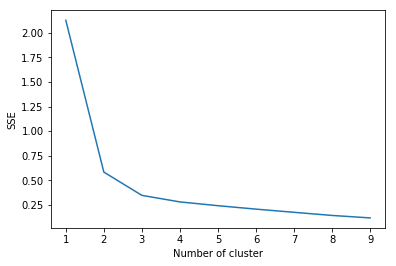

In [21]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
%matplotlib inline

# normalize the density feature and add it for K-means
density['Density'] = (density['Density'] - min(density['Density']))/(max(density['Density'])-min(density['Density']))
HK_grouped_clustering = HK_grouped.join(density.set_index('District'), on='District')
HK_grouped_clustering = HK_grouped_clustering.drop('District', 1)

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(HK_grouped_clustering)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Select k = 5 for the k-means

In [22]:
# set number of clusters
kclusters = 4

HK_grouped_clustering = HK_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(HK_grouped_clustering)

# add clustering labels
district_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

HK_merged = HK[['District', 'Latitude', 'Longitude']]

HK_merged = HK_merged.join(district_venues_sorted.set_index('District'), on='District')

HK_merged

,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Density
0,Central and Western,22.286660,114.15497,0,Coffee Shop,Hotel,Gym / Fitness Center,Yoga Studio,Japanese Restaurant,Bar,Café,Cantonese Restaurant,French Restaurant,Indian Restaurant,19421.221865
1,Wan Chai,22.277020,114.17232,0,Hotel,Café,Italian Restaurant,Coffee Shop,Cantonese Restaurant,Chinese Restaurant,Bar,Szechuan Restaurant,Steakhouse,Hotel Bar,18250.254323
2,Eastern,22.284110,114.22414,3,Park,Chinese Restaurant,Japanese Restaurant,Department Store,Seafood Restaurant,Mountain,Dim Sum Restaurant,Noodle House,Cantonese Restaurant,Coffee Shop,29439.655172
3,Southern,22.247250,114.15884,0,Theme Park Ride / Attraction,Hotel,Café,Coffee Shop,Aquarium,Fast Food Restaurant,Scenic Lookout,Clothing Store,Furniture / Home Store,Shopping Mall,6792.792793
4,Yau Tsim Mong,22.321380,114.17260,2,Coffee Shop,Chinese Restaurant,Hotel,Dim Sum Restaurant,Shopping Mall,Snack Place,Malay Restaurant,Noodle House,Dumpling Restaurant,Cha Chaan Teng,47725.321888
5,Sham Shui Po,22.330983,114.16224,2,Chinese Restaurant,Noodle House,Dessert Shop,Dim Sum Restaurant,Coffee Shop,Dumpling Restaurant,Cha Chaan Teng,Shopping Mall,Cantonese Restaurant,Café,42844.919786
6,Kowloon City,22.316670,114.18333,2,Dessert Shop,Hotel,Chinese Restaurant,Coffee Shop,Shopping Mall,Noodle House,Toy / Game Store,Athletics & Sports,Snack Place,Market,41107.784431
7,Wong Tai Sin,22.350000,114.18333,1,Café,Chinese Restaurant,Fast Food Restaurant,Dessert Shop,Coffee Shop,Shopping Mall,Japanese Restaurant,Trail,Asian Restaurant,Park,45225.806452
8,Kwun Tong,22.323300,114.21540,1,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Café,Shopping Mall,Hong Kong Restaurant,Multiplex,Sushi Restaurant,Noodle House,Cantonese Restaurant,58926.353150
9,Kwai Tsing,22.352880,114.10004,3,Chinese Restaurant,Shopping Mall,Park,Noodle House,Sushi Restaurant,Japanese Restaurant,Cha Chaan Teng,Coffee Shop,Italian Restaurant,Café,21748.071979


Visualize the resulting clusters

In [23]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
#len(ys) is the number of color
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(HK_merged['Latitude'], HK['Longitude'], HK_merged['District'], HK_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1.0).add_to(map_clusters)
       
map_clusters

## 7. Examine Clusters
Examine each cluster and determine the discriminating venue categories that distinguish each cluster

### Cluster 0 - RED
Districts close to airport, or where tourists like to stay or visit

In [24]:
print(HK_merged.loc[HK_merged['Cluster Labels'] == 0, HK_merged.columns[[0] + list(range(4, HK_merged.shape[1]))]].shape)
HK_merged.loc[HK_merged['Cluster Labels'] == 0, HK_merged.columns[[0] + list(range(4, HK_merged.shape[1]))]]

(4, 12)


,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Density
0,Central and Western,Coffee Shop,Hotel,Gym / Fitness Center,Yoga Studio,Japanese Restaurant,Bar,Café,Cantonese Restaurant,French Restaurant,Indian Restaurant,19421.221865
1,Wan Chai,Hotel,Café,Italian Restaurant,Coffee Shop,Cantonese Restaurant,Chinese Restaurant,Bar,Szechuan Restaurant,Steakhouse,Hotel Bar,18250.254323
3,Southern,Theme Park Ride / Attraction,Hotel,Café,Coffee Shop,Aquarium,Fast Food Restaurant,Scenic Lookout,Clothing Store,Furniture / Home Store,Shopping Mall,6792.792793
17,Islands,Airport Lounge,Bakery,Coffee Shop,Beach,Seafood Restaurant,Gift Shop,Accessories Store,Café,Mountain,Japanese Restaurant,915.372316


### Cluster 1 - PURPLE
Districts with a variety of restaurants and coffee shops

In [25]:
print(HK_merged.loc[HK_merged['Cluster Labels'] == 1, HK_merged.columns[[0] + list(range(4, HK_merged.shape[1]))]].shape)
HK_merged.loc[HK_merged['Cluster Labels'] == 1, HK_merged.columns[[0] + list(range(4, HK_merged.shape[1]))]]

(8, 12)


,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Density
7,Wong Tai Sin,Café,Chinese Restaurant,Fast Food Restaurant,Dessert Shop,Coffee Shop,Shopping Mall,Japanese Restaurant,Trail,Asian Restaurant,Park,45225.806452
8,Kwun Tong,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Café,Shopping Mall,Hong Kong Restaurant,Multiplex,Sushi Restaurant,Noodle House,Cantonese Restaurant,58926.353150
11,Tuen Mun,Seafood Restaurant,Shopping Mall,Fast Food Restaurant,Chinese Restaurant,Coffee Shop,Italian Restaurant,Hong Kong Restaurant,Cantonese Restaurant,Park,Train Station,5796.839184
12,Yuen Long,Chinese Restaurant,Fast Food Restaurant,Coffee Shop,Shopping Mall,Noodle House,Café,Train Station,Thai Restaurant,Convenience Store,Pizza Place,4513.939044
13,North,Chinese Restaurant,Coffee Shop,Fast Food Restaurant,Hotel,Café,Noodle House,Shopping Mall,Dessert Shop,Train Station,Hong Kong Restaurant,2289.729888
14,Tai Po,Chinese Restaurant,Coffee Shop,Fast Food Restaurant,Noodle House,Café,Hotel,Plaza,Trail,Restaurant,Park,2229.893500
15,Sha Tin,Chinese Restaurant,Café,Fast Food Restaurant,Train Station,Coffee Shop,Shopping Mall,Cantonese Restaurant,Hotel,Park,Dessert Shop,9861.737738
16,Sai Kung,Café,Fast Food Restaurant,Coffee Shop,Seafood Restaurant,Chinese Restaurant,Thai Restaurant,Campground,Shopping Mall,Park,Beach,3577.323563


### Cluster 2 - BLUE
High density districts with a lot of Asian cuisines, coffee shops and shopping malls

In [26]:
print(HK_merged.loc[HK_merged['Cluster Labels'] == 2, HK_merged.columns[[0] + list(range(4, HK_merged.shape[1]))]].shape)
HK_merged.loc[HK_merged['Cluster Labels'] == 2, HK_merged.columns[[0] + list(range(4, HK_merged.shape[1]))]]

(3, 12)


,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Density
4,Yau Tsim Mong,Coffee Shop,Chinese Restaurant,Hotel,Dim Sum Restaurant,Shopping Mall,Snack Place,Malay Restaurant,Noodle House,Dumpling Restaurant,Cha Chaan Teng,47725.321888
5,Sham Shui Po,Chinese Restaurant,Noodle House,Dessert Shop,Dim Sum Restaurant,Coffee Shop,Dumpling Restaurant,Cha Chaan Teng,Shopping Mall,Cantonese Restaurant,Café,42844.919786
6,Kowloon City,Dessert Shop,Hotel,Chinese Restaurant,Coffee Shop,Shopping Mall,Noodle House,Toy / Game Store,Athletics & Sports,Snack Place,Market,41107.784431


### Cluster 3 - GREEN
Districts with many parks, Asian cuisines and close to mountains

In [27]:
print(HK_merged.loc[HK_merged['Cluster Labels'] == 3, HK_merged.columns[[0] + list(range(4, HK_merged.shape[1]))]].shape)
HK_merged.loc[HK_merged['Cluster Labels'] == 3, HK_merged.columns[[0] + list(range(4, HK_merged.shape[1]))]]

(3, 12)


,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Density
2,Eastern,Park,Chinese Restaurant,Japanese Restaurant,Department Store,Seafood Restaurant,Mountain,Dim Sum Restaurant,Noodle House,Cantonese Restaurant,Coffee Shop,29439.655172
9,Kwai Tsing,Chinese Restaurant,Shopping Mall,Park,Noodle House,Sushi Restaurant,Japanese Restaurant,Cha Chaan Teng,Coffee Shop,Italian Restaurant,Café,21748.071979
10,Tsuen Wan,Park,Chinese Restaurant,Coffee Shop,Hotel,Dessert Shop,Japanese Restaurant,Noodle House,Sushi Restaurant,Bus Stop,Mountain,5081.834387
